In [ ]:
from dotenv import load_dotenv
import os
import sys

load_dotenv()

CAMB_KEY = os.getenv("CAMB_KEY")
OPENROUTER_KEY = os.getenv("OPENROUTER_KEY")
TOGETHER_KEY = os.getenv("TOGETHER_KEY")
GROQ_KEY = os.getenv("GROQ_KEY")

# 1. Text GPT (Get text script) - [OpenRouter] 

In [2]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=OPENROUTER_KEY,
)

completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
  },
  extra_body={},
#   model="mistralai/mistral-small-3.1-24b-instruct:free",
     model="deepseek/deepseek-prover-v2:free",
#   messages=[
#     {
#       "role": "user",
#       "content": [
#         {
#           "type": "text",
#           "text": "What is in this image?"
#         },
#         {
#           "type": "image_url",
#           "image_url": {
#             "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
#           }
#         }
#       ]
#     }
#   ]
    messages=[
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": "Hãy gợi ý cho tôi 3 chủ đề để viết một bài luận về chủ đề \"Thể thao\"."
            },
        ]    
        }

    ]
)
print(completion.choices[0].message.content)

1. **Tầm quan trọng của thể thao đối với sức khỏe tinh thần:** Bài luận có thể thảo luận về cách thể thao và hoạt động thể chất giúp giảm căng thẳng, lo âu và trầm cảm, đồng thời tăng cường sự tự tin và tinh thần đồng đội.

2. **Thể thao như một công cụ hòa nhập xã hội và phát triển cá nhân:** Bài luận có thể khám phá cách thể thao đem lại cơ hội cho mọi người ở mọi lứa tuổi và nền tảng xã hội để kết nối, học hỏi lẫn nhau và phát triển các kỹ năng sống như lãnh đạo, kiên trì và kỷ luật.

3. **Tác động của thể thao chuyên nghiệp đến xã hội và kinh tế:** Bài luận có thể bàn luận về cách các môn thể thao chuyên nghiệp ảnh hưởng đến nền kinh tế, văn hóa và thậm chí chính trị của một quốc gia hoặc khu vực, đồng thời thảo luận về các vấn đề như thương mại hóa và áp lực đối với vận động viên.


# 2. Text to Speech (Get .wav) - [Camb.ai]

In [3]:
# import requests, os, time

# BASE_URL = "https://client.camb.ai/apis"
# HEADERS = {"headers": {"x-api-key": CAMB_KEY}}

# tts_payload = {
#     "text": "Khi tham gia chat, bạn có thể nhắn tin và nhận được thông báo. Nếu đoạn chat đã đủ người mà bạn không hoạt động, bạn có thể sẽ phải tham gia lại.",
#     "voice_id": 20298,  # Example voice ID
#     "language": 136,  # VN
#     "age": 30,
#     "gender": 1,  # Male
# }

# res = requests.post(f"{BASE_URL}/tts", json=tts_payload, **HEADERS)
# task_id = res.json()["task_id"]
# print(f"Task ID: {task_id}")

# while True:
#     res = requests.get(f"{BASE_URL}/tts/{task_id}", **HEADERS)
#     status = res.json()["status"]
#     print(f"Polling: {status}")
#     time.sleep(1.5)
#     if status == "SUCCESS":
#         run_id = res.json()["run_id"]
#         break

# print(f"Run ID: {run_id}")
# res = requests.get(f"{BASE_URL}/tts-result/{run_id}", **HEADERS, stream=True)
# with open("tts_output.wav", "wb") as f:
#     for chunk in res.iter_content(chunk_size=1024):
#         f.write(chunk)
# print("Done!")

# """
# Get list of voices
# """
# import requests

# url = "https://client.camb.ai/apis/list-voices"

# headers = {"x-api-key": CAMB_KEY}

# response = requests.request("GET", url, headers=headers)

# print(response.text)

# """
# Get list of languages
# """
# import requests

# url = "https://client.camb.ai/apis/source-languages"

# headers = {"x-api-key": CAMB_KEY}

# response = requests.request("GET", url, headers=headers)

# print(response.text)

# 2. Text to Speech (Get .wav) - [Groq]

In [ ]:
import os
from groq import Groq

client = Groq(api_key=GROQ_KEY)

speech_file_path = "speech.wav" 
model = "playai-tts"
voice = "Fritz-PlayAI"
text = "Hello. Nice to meet you. I’m John Davis. I’m 20 years old and a college student too. I study at a university in Chicago. My favorite classes are Art, Spanish, and Science. I find History a bit challenging. The teachers are friendly, and I’m in my second year. I’m enjoying my time at college."
response_format = "wav"

response = client.audio.speech.create(
    model=model,
    voice=voice,
    input=text,
    response_format=response_format
)

response.write_to_file(speech_file_path)

# 3. Text to Image (Get .png) - [Together.ai]

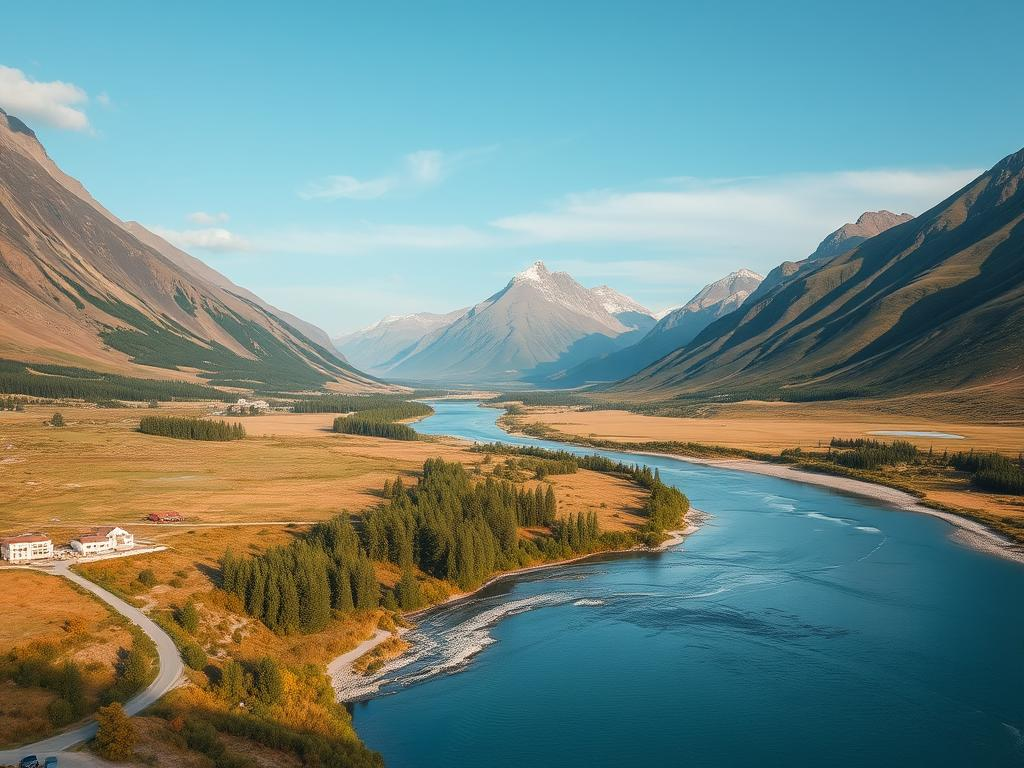

In [5]:
from together import Together
import os
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display

os.environ["TOGETHER_API_KEY"] = TOGETHER_KEY

client = Together()
response = client.images.generate(
    prompt="A beautiful landscape with mountains and a river",
    model="black-forest-labs/FLUX.1-schnell-Free",
    width=1024,
    height=768,
    steps=4,
    n=1,
    response_format="b64_json",
    stop=[]
)
# Decode the base64 image data
image_data = base64.b64decode(response.data[0].b64_json)

# Convert the binary data to an image
image = Image.open(BytesIO(image_data))

# Save the image to the current path with the name "image.png"
image.save("image.png")

# Display the image in the Jupyter Notebook
display(image)


# 4. Combine .png + .wav (Get .mp4) - [ffmpeg-python]

In [6]:
# Ensure ffmpeg-python is installed
import subprocess

def create_video(image_path, audio_path, output_path):
    """
    Create a video from an image and audio using FFmpeg.

    :param image_path: Path to the image file.
    :param audio_path: Path to the audio file.
    :param output_path: Path to save the output video.
    """
    try:
        # FFmpeg command to combine image and audio into a video
        command = [
            "ffmpeg",
            "-loop", "1",  # Loop the image
            "-i", image_path,  # Input image
            "-i", audio_path,  # Input audio
            "-c:v", "libx264",  # Video codec
            "-tune", "stillimage",  # Optimize for still images
            "-c:a", "aac",  # Audio codec
            "-b:a", "192k",  # Audio bitrate
            "-pix_fmt", "yuv420p",  # Pixel format
            "-shortest",  # Match video duration to audio
            output_path  # Output file
        ]

        # Run the FFmpeg command
        subprocess.run(command, check=True)
        print(f"Video created successfully: {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")
    except FileNotFoundError:
        print("FFmpeg is not installed or not found in PATH.")

# Example usage
image_file = "image.png"  # Replace with your image file path
audio_file = "speech.wav"  # Replace with your audio file path
output_file = "output_video.mp4"  # Replace with your desired output file path

create_video(image_file, audio_file, output_file)


Video created successfully: output_video.mp4


# 5. Speech to Text (Get .srt) - [Groq]

In [ ]:
import os
import json
from groq import Groq

# Initialize the Groq client
client = Groq(api_key=GROQ_KEY)

# Specify the path to the audio file
filename = "speech.wav" # Replace with your audio file!

# Open the audio file
with open(filename, "rb") as file:
    # Create a transcription of the audio file
    transcription = client.audio.transcriptions.create(
      file=file, # Required audio file
      model="distil-whisper-large-v3-en", # Required model to use for transcription
      prompt="Specify context or spelling",  # Optional
      response_format="verbose_json",  # Optional
      timestamp_granularities = ["word","segment"], # Optional (must set response_format to "json" to use and can specify "word", "segment" (default), or both)
      language="en",  # Optional
      temperature=0.0  # Optional
    )
    # To print only the transcription text, you'd use print(transcription.text) (here we're printing the entire transcription object to access timestamps)
    print(json.dumps(transcription, indent=2, default=str))

    print(transcription.words)

"Transcription(text=\" Hello. Nice to meet you. I'm John Davis. I'm 20 years old and a college student, too. I study at a university in Chicago. My favorite classes are art, Spanish, and science. I find history a bit challenging. The teachers are friendly, and I'm in my second year. I'm enjoying my time at college.\", task='transcribe', language='English', duration=24.6, words=[{'word': 'Hello.', 'start': 0, 'end': 0.54}, {'word': 'Nice', 'start': 0.54, 'end': 1.4}, {'word': 'to', 'start': 1.4, 'end': 1.56}, {'word': 'meet', 'start': 1.56, 'end': 1.72}, {'word': 'you.', 'start': 1.72, 'end': 2.16}, {'word': \"I'm\", 'start': 2.16, 'end': 3.06}, {'word': 'John', 'start': 3.06, 'end': 3.32}, {'word': 'Davis.', 'start': 3.32, 'end': 4.02}, {'word': \"I'm\", 'start': 4.02, 'end': 5.26}, {'word': '20', 'start': 5.26, 'end': 5.52}, {'word': 'years', 'start': 5.52, 'end': 5.66}, {'word': 'old', 'start': 5.66, 'end': 5.98}, {'word': 'and', 'start': 5.98, 'end': 6.14}, {'word': 'a', 'start': 6.

In [8]:
def convert_to_srt(words, output_file="transcription.srt"):
    """
    Convert word-level transcription data to SRT format and save to file
    
    Args:
        words: List of dictionaries with word, start, and end times
        output_file: Path to save the SRT file
    """
    if not words:
        print("No words data provided")
        return
        
    # Group words into subtitle segments (here grouping by ~5 words per segment)
    segments = []
    current_segment = []
    word_count = 0
    
    for word_data in words:
        current_segment.append(word_data)
        word_count += 1
        
        # Create a new segment after every 5 words
        # You can adjust this logic for your specific needs
        if word_count == 5:
            segments.append(current_segment)
            current_segment = []
            word_count = 0
            
    # Add any remaining words
    if current_segment:
        segments.append(current_segment)
    
    # Format time as HH:MM:SS,mmm
    def format_time(seconds):
        # Handle potential floating point precision issues
        ms = int((seconds % 1) * 1000)
        s = int(seconds) % 60
        m = int(seconds / 60) % 60
        h = int(seconds / 3600)
        return f"{h:02d}:{m:02d}:{s:02d},{ms:03d}"
    
    # Generate SRT content
    srt_content = ""
    for i, segment in enumerate(segments, 1):
        if not segment:
            continue
            
        # Get start time from first word and end time from last word
        start_time = segment[0]['start']
        end_time = segment[-1]['end']
        
        # Join all words in the segment
        text = " ".join(item['word'] for item in segment)
        
        # Format as SRT entry
        srt_entry = f"{i}\n{format_time(start_time)} --> {format_time(end_time)}\n{text}\n\n"
        srt_content += srt_entry
    
    # Write to file
    with open(output_file, "w") as f:
        f.write(srt_content)
    
    print(f"SRT file created: {output_file}")

convert_to_srt(transcription.words, "speech.srt")


SRT file created: speech.srt


# 6. Add Subtitle for .mp4 video (Combine .mp4 + .srt) - [ffmpeg-python]

In [9]:
import subprocess

def add_subtitles(video_path, subtitle_path, output_path):
    try:
        # FFmpeg command to add subtitles
        command = [
            "ffmpeg",
            "-i", video_path,  # Input video
            "-vf", f"subtitles={subtitle_path}",  # Add subtitles filter
            "-c:a", "copy",  # Copy audio without re-encoding
            output_path  # Output video
        ]
        
        # Run the command
        subprocess.run(command, check=True)
        print(f"Subtitles added successfully! Output saved to: {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")
    except FileNotFoundError:
        print("FFmpeg is not installed or not found in PATH.")

# Example usage
video_file = "output_video.mp4"
subtitle_file = "speech.srt"
output_file = "output_video_with_subtitles.mp4"

add_subtitles(video_file, subtitle_file, output_file)


Subtitles added successfully! Output saved to: output_video_with_subtitles.mp4
